In [4]:
import pandas as pd
import numpy as np

In [5]:
# display full url for user_profile for instance
pd.set_option('display.max_colwidth', 1000)

In [6]:
df = pd.read_csv("/Users/noesautel/Downloads/raw_amazon_echo_reviews.csv")

In [7]:
df['a-size-mini 3'] = np.where(df['a-size-mini 3']=='Achat vérifié', 'true', 'false')
df.rename(index=str, columns={"a-size-mini 3": "verified_urchase"}).head(1)

,user_profile,a-profile-avatar,user_name,original_comment_link,score,title,product_color,a-link-normal href 2,verified_urchase,a-base 3,review-comment-total,a-link-normal,a-link-normal href 3,a-link-normal 2,a-link-normal href 4
0,https://www.amazon.fr/gp/profile/amzn1.account.AEQRMOTTIKZ3AZY42FZZ25O3SSFA/ref=cm_cr_arp_d_gw_btm?ie=UTF8,"<img src=""https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"">",Pascal GILBERT,https://www.amazon.fr/gp/customer-reviews/R24VBH3FB5FK1C/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B079PNT5TK,"2,0 sur 5 étoiles","Bon, ben c'est Echo 2 quoi...",Couleur: Tissu anthraciteConfiguration: Amazon Echo,https://www.amazon.fr/Amazon-g%C3%A9n%C3%A9ration-Enceinte-connect%C3%A9e-anthracite/product-reviews/B079PNT5TK/ref=cm_cr_arp_d_rvw_rvwer?ie=UTF8&reviewerType=avp_only_reviews,true,355 personnes ont trouvé cela utile,3,Le plus récent,https://www.amazon.fr/Amazon-g%C3%A9n%C3%A9ration-Enceinte-connect%C3%A9e-anthracite/product-reviews/B079PNT5TK/ref=dpx_acr_txt?showViewpoints=1#,Le plus ancien,https://www.amazon.fr/Amazon-g%C3%A9n%C3%A9ration-Enceinte-connect%C3%A9e-anthracite/product-reviews/B079PNT5TK/ref=dpx_acr_txt?showViewpoints=1#


In [8]:
df = df.rename(index=str, columns={"title": "comment_title"})
df = df.drop(['a-profile-avatar', 'a-link-normal href 2', 'a-link-normal', 'a-link-normal href 3', 'a-link-normal 2', 'a-link-normal href 4'  ], axis= 1)

In [9]:
df1 = df[df['a-base 3'].apply(lambda x: x.isnumeric())]
df1['a-base 3'].unique()
print(df.shape)
print(df1.shape)

(2368, 9)
(0, 9)


In [10]:
# couleur du produit

df['product_color'] = df['product_color'].str.replace('Couleur: Tissu ','')
df['product_color'] = df['product_color'].str.replace('Configuration: Amazon Echo','')

In [11]:
#score du produit

df['score_str'] = df['score'].astype(str).str[0] # on recupère la note sans le string ",0 sur 5 étoiles"
df = df.drop(['score'], axis= 1)
df['score_str'] = df['score_str'].apply(np.int64)
df = df.rename(index=str, columns={"score_str": "product_score"})

La collecte des données concernant le nombre de personne ayant trouvé le commentaire de l'acheteur utile ne sera pas pris en compte. En effet,on se rend compte que plus de 1700 lignes ont été mal extraites avec Instant Data Scraper. Je prends donc la décision de supprimer cette collone. Si elle nous ai réellement utlile, je reprendrai le tempsplus tard d'extraire ces informations correctement.

In [12]:
#df.groupby('a-base 3').count() # on s'aperçoit du nombre d'erreurs avec "Signaler un abus" qui apparait 1778 fois...

# Sélectionner uniquement le nombre de personne ayant trouvé le commentaire utile (et donc supprimer le reste de la string)

#df['a-base 3'] = df['a-base 3'].str.replace(' personnes ont trouvé cela utile','')
#df['a-base 3'] = df['a-base 3'].str.replace('Une personne a trouvé cela utile','1')
#df['a-base 3'].unique()
#df = df.rename(index=str, columns={"a-base 3": "people_found_comment_helpful"})
#df['people_found_comment_helpful'] = df['people_found_comment_helpful'].apply(np.int64)

La moyenne du produit est de: 4.04


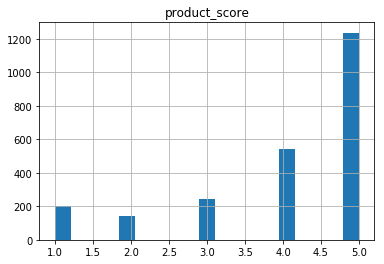

In [15]:
%precision

df.hist(column='product_score', bins=19)
print("La moyenne du produit est de: "+str(df.product_score.mean().round(2)))

In [14]:
df.to_csv('amazon_echo_reviews_cleaned.csv', sep='\t', encoding='utf-8')